## Digital Images

The dictionary defines a *pixel* (abbreviation of _picture element_) as a "minute area of illumination on a display screen, one of many from which an image is composed."  We therefore consider a digital image as a set of pixels, each of them defined by its location (no matter the kind of coordinates chosen) and the intensity of light of the corresponding image at that location.  

Depending on the way we measure intensity, a digital image belongs to one of three possible types:

* Binary
* Gray-scale
* Color (with or without an alpha channel)

### Binary

In a *binary image* there are only two possible intensities---light or dark.  Such images are traditionally best implemented as simple 2-dimensional Boolean arrays.  `True` indicates a bright spot, while `False` measures a dark spot.


For instance, to create a binary image of size 128-by-128, with a single disk of radius 6 centered at the location `(30, 100)`, we could issue the following:


In [2]:
import numpy as np, matplotlib.pyplot as plt

%matplotlib inline

disk = lambda x,y: (x-30)**2 + (y-100)**2 <= 36

image = np.fromfunction(disk, (128, 128))

image.dtype

dtype('bool')

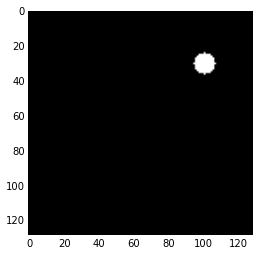

In [4]:
plt.imshow(image)
plt.gray()

> Another method to generate geometric shapes on a binary image is the set of utilities in the modules `skimage.draw` or `skimage.morphology`.  For instance, the previous could have been generated as follows:

>        >>> from skimage.draw import circle
>        >>> image = np.zeros((128, 128)).astype('bool')
>        >>> image[circle(30, 100, 6)] = True

> The module `skimage.draw` has routines to create other two dimensional geometric shapes:

>    * Lines: `skimage.draw.line`. There is also an anti-aliased version of a line, for gray-scale images: `skimage.draw.line_aa`.
>    * Circles: `skimage.draw.circle`, `skimage.draw.circle_perimeter`. There is also an anti-aliased version of a circle perimeter, for gray-scale images: `skimage.draw.circle_perimeter_aa`.
>    * Ellipses: `skimage.draw.ellipse`, `skimage.draw.ellipse_perimeter`.
>    * Polygons: `skimage.draw.polygon`.

### Gray-scale
A *gray-scale image* is the traditional method of representing _black-and-white_ pictures.  In these images, the intensity of the light is represented as different scales of gray.  White indicates the brightest, and black signifies no light.  The number of different scales is predetermined, and usually a dyadic number (we could choose a little as 16 scales, or as much as 256, for example).  In any case, the highest value is always reserved for brightest (white), and the lowest for darkest (black).  A simple 2-dimensional array is a good way to store this information.

The `scipy` library has a test image conforming to this category.  In the toolkit `skimage`, we also have a few test images of the same characteristics: 


In [5]:
from scipy.misc import lena
from skimage.data import coins

lena().shape

(512, 512)

In [6]:
lena()

array([[162, 162, 162, ..., 170, 155, 128],
       [162, 162, 162, ..., 170, 155, 128],
       [162, 162, 162, ..., 170, 155, 128],
       ..., 
       [ 43,  43,  50, ..., 104, 100,  98],
       [ 44,  44,  55, ..., 104, 105, 108],
       [ 44,  44,  55, ..., 104, 105, 108]])

In [8]:
coins().shape

(303, 384)

In [9]:
coins()

array([[ 47, 123, 133, ...,  14,   3,  12],
       [ 93, 144, 145, ...,  12,   7,   7],
       [126, 147, 143, ...,   2,  13,   3],
       ..., 
       [ 81,  79,  74, ...,   6,   4,   7],
       [ 88,  82,  74, ...,   5,   7,   8],
       [ 91,  79,  68, ...,   4,  10,   7]], dtype=uint8)

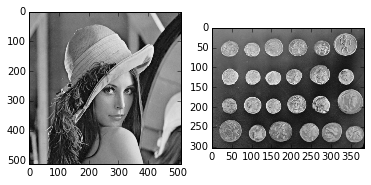

In [10]:
plt.figure()
plt.subplot(121)
plt.imshow(lena())
plt.subplot(122)
plt.imshow(coins())
plt.show()

> On the left, _Lena_: The standard (and controversial!) test image scanned from the November 1972 edition of Playboy magazine.  On the right, _Greek coins from Pompeii_: Image downloaded from the Brooklin Museum collection.  Neither image has any known copyright restrictions.

### Color

In *color images*, we have many different methods to store the underlying information.  The most common method, the one which also provides easiest computational structures to create algorithms, is the *RGB color space*.  In this method, an image representation contains at least three layers.  For each pixel, we assess the combined information of the amounts of red, green and blue necessary to achieve the desired color and intensity at the corresponding location. The first layer indicates the intensities of underlying reds. The second and third layers indicate respectively the intensities of greens and blues.  


In [11]:
from skimage.data import coffee

coffee().shape

(400, 600, 3)

In [12]:
coffee()

array([[[ 21,  13,   8],
        [ 21,  13,   9],
        [ 20,  11,   8],
        ..., 
        [228, 182, 138],
        [231, 185, 142],
        [228, 184, 140]],

       [[ 21,  13,   7],
        [ 21,  13,   9],
        [ 20,  14,   7],
        ..., 
        [228, 182, 136],
        [231, 185, 139],
        [229, 183, 137]],

       [[ 21,  14,   7],
        [ 23,  13,  10],
        [ 20,  14,   9],
        ..., 
        [228, 182, 136],
        [228, 184, 137],
        [229, 185, 138]],

       ..., 
       [[189, 124,  77],
        [214, 155, 109],
        [197, 141, 100],
        ..., 
        [165,  86,  37],
        [161,  82,  41],
        [143,  67,  29]],

       [[207, 148, 102],
        [201, 142,  99],
        [196, 140,  97],
        ..., 
        [154,  74,  37],
        [147,  66,  33],
        [145,  65,  31]],

       [[197, 141, 100],
        [195, 137,  99],
        [193, 138,  98],
        ..., 
        [158,  73,  38],
        [144,  64,  30],
        [143,  60,

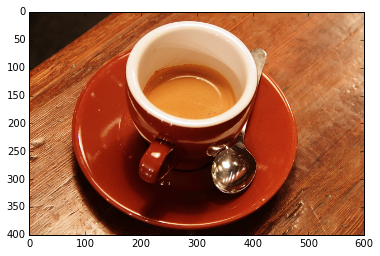

In [13]:
plt.imshow(coffee())

> This photograph, taken by Rachel Michetti, is courtesy of Pikolo Espresso Bar.  No copyright restrictions.

To collect the data corresponding of each of the layers, we issue simple slicing operations.

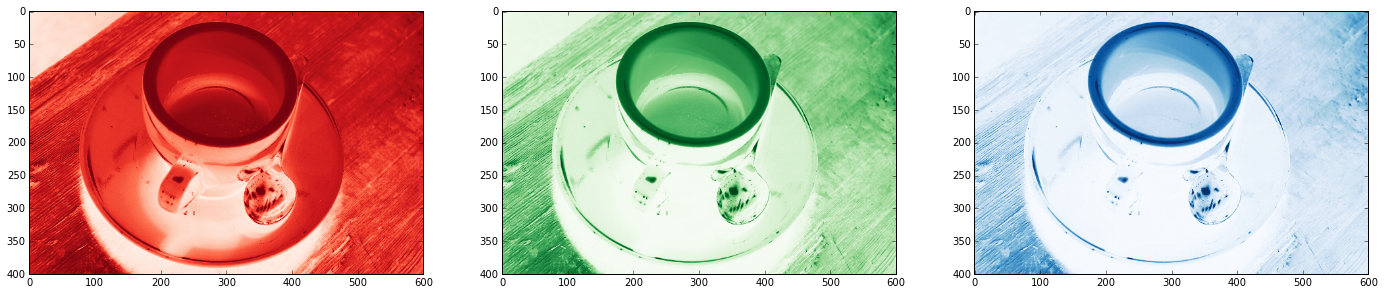

In [15]:
plt.figure(figsize=(24,12))
plt.subplot(131)
plt.imshow(coffee()[:,:,0], cmap=plt.cm.Reds)
plt.subplot(132)
plt.imshow(coffee()[:,:,1], cmap=plt.cm.Greens)
plt.subplot(133)
plt.imshow(coffee()[:,:,2], cmap=plt.cm.Blues)
plt.show()

All functions in the libraries of the `scipy` stack described in this chapter assume that any color image is represented in this scheme.  There are other color schemes, designed to address other fundamental questions and properties of images.  A process to transform among most of the frequent color spaces is available in the toolkit `scikit-image`, as the function `convert-colorspace` in the submodule `skimage.color`.

For example, consider the *HSV color space* (for _Hue-Saturation-Value_).  This is a cylindrical-coordinate representation of points from a RGB color space, where the angle around the central vertical axis corresponds to hue ('H') and the distance from the axis corresponds to saturation ('S').  The height corresponds to a third value ('V'), the system's representation of the perceived luminance (think brightness of the underlying combination of colors) in relation to the saturation.

In [16]:
from skimage.color import convert_colorspace

convert_colorspace(coffee(), 'RGB', 'HSV')

array([[[ 0.06410256,  0.61904762,  0.08235294],
        [ 0.05555556,  0.57142857,  0.08235294],
        [ 0.04166667,  0.6       ,  0.07843137],
        ..., 
        [ 0.08148148,  0.39473684,  0.89411765],
        [ 0.08052434,  0.38528139,  0.90588235],
        [ 0.08333333,  0.38596491,  0.89411765]],

       [[ 0.07142857,  0.66666667,  0.08235294],
        [ 0.05555556,  0.57142857,  0.08235294],
        [ 0.08974359,  0.65      ,  0.07843137],
        ..., 
        [ 0.08333333,  0.40350877,  0.89411765],
        [ 0.08333333,  0.3982684 ,  0.90588235],
        [ 0.08333333,  0.40174672,  0.89803922]],

       [[ 0.08333333,  0.66666667,  0.08235294],
        [ 0.03846154,  0.56521739,  0.09019608],
        [ 0.07575758,  0.55      ,  0.07843137],
        ..., 
        [ 0.08333333,  0.40350877,  0.89411765],
        [ 0.08608059,  0.39912281,  0.89411765],
        [ 0.08608059,  0.39737991,  0.89803922]],

       ..., 
       [[ 0.06994048,  0.59259259,  0.74117647],
        

> Among the other color spaces available are the *CIE XYZ* method of measuring *tristimulus values*, or the *CIE-LUB* and *CIE-LAB* color spaces.  The best resource to learn how to access and use them in the environment of the `scipy` stack is the documentation of the module `skimage.color` in the pages of their official documentation: http://scikit-image.org/docs/stable/api/skimage.color.html

It is also possible to produce a gray-scale version of any color image provided in RGB color space, by adding the three layers with appropriate weights.  In the `skimage.color` module we have for instance the functions `rgb2gray` or `rgb2grey`, that employ the following formula: `output = 0.2125 * red + 0.7154 * green + 0.0721 * blue`.  

### Alpha Channels 
In either gray-scale or color images, we sometimes indicate an extra layer that gives us information about the opacity of each pixel.  This is referred to as the *alpha channel*.  Traditionally, we incorporate this property of our images as an additional layer of a RGB---the so-called *RGBA color space*.  In that case, images represented by this scheme have 4 layers instead of 3.

In [17]:
from skimage.data import horse

horse().shape

(328, 400, 4)

In [18]:
horse()

array([[[255, 255, 255, 110],
        [255, 255, 255, 217],
        [255, 255, 255, 255],
        ..., 
        [255, 255, 255, 255],
        [255, 255, 255, 217],
        [255, 255, 255, 110]],

       [[255, 255, 255, 217],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ..., 
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 217]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ..., 
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ..., 
       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ..., 
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 217],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ..., 
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 217]],

       

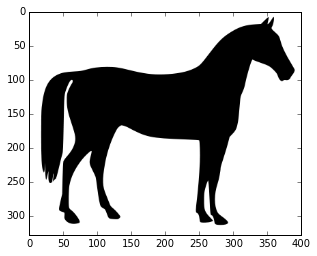

In [19]:
plt.imshow(horse())